In [1]:
# 假设你现在打算卖房子，想知道房子能卖多少钱？
# 我们拥有房子面积和卧室数量以及房子价格之间的对应数据： ex1data2.txt

## 读取数据

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('ex1data2.txt', names=['size', 'bedrooms', 'price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 特征归一化

In [57]:
# 我们面对多维特征问题的时候，我们要保证这些特征都具有相近的尺度，这将帮助梯度下降算法更快地收敛
# 上面的数据当中，房屋的尺寸和房间的数量，尺寸的值为 0-5000 平方英尺，而房间数量的值则是 0-4
# 以两个参数分别为横纵坐标，绘制代价函数的等高线图能，看出图像会显得很扁，梯度下降算法需要非常多次的迭代才能收敛
# 解决的方法是我们要先对数据进行数据预处理，尝试将所有特征的尺度都尽量缩放到 -1到 1之间
def normalize_feature(data):
    return (data - data.mean()) / data.std()
# 每个数据减去数据的均值然后初一方差

In [58]:
data = normalize_feature(data)

In [59]:
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


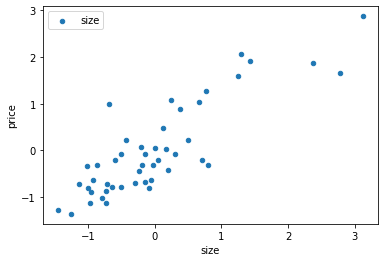

In [60]:
# 稍微数据可视化一下，这里 feature 只有 2 个，还是可以可视化，多于 3 个就不好可视化了
data.plot.scatter('size', 'price', label='size')
plt.show()

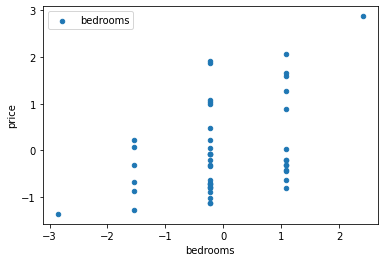

In [61]:
data.plot.scatter('bedrooms', 'price', label='bedrooms')
plt.show()

In [62]:
# 同理 和单变量线性回归是一样的，先进行数据的处理，在 X 最左边加一列
data.insert(0, 'ones', 1)
data.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


## 构造数据集

In [63]:
# 同理对数据进行分离得到数据集
# 前面 3 列是 X，最后一列是 y
X = data.iloc[:, 0:-1]

In [64]:
X.head() # 测试是否构造成功

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [65]:
y = data.iloc[:, -1]

In [66]:
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [67]:
# 同理，为了之后的矩阵运算，要将其 dataFrame 数据格式转换为数组
X = X.values

In [68]:
X.shape

(47, 3)

In [69]:
y = y.values

In [70]:
y.shape

(47,)

In [71]:
y = y.reshape(47, 1)

In [72]:
y.shape

(47, 1)

## 构造损失函数

In [73]:
def costFunction(X, y, theta):
    inner = np.power(X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [79]:
# 初始化 theta 的时候要清楚知道 theta 的维度要初始化成多少，这与 X 和 y 的 shape有直接关系
theta = np.zeros((3, 1))

In [80]:
# 看看初始的损失函数
cost_init = costFunction(X, y, theta)
print(cost_init)

0.4893617021276595


## 梯度下降函数

In [81]:
def gardientDescent(X, y, theta, alpha, iters, isprint=False):
    
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y)) * alpha / len(X)
        cost = costFunction(X, y, theta)
        costs.append(cost)
        
        if i % 100 == 0:
            if isprint:
                print(cost)
    
    return theta, costs

In [82]:
# 不同于单变量线性回归
# 我们这里看看不同 alpha（学习率）下的效果
candidate_alpha = [0.0003, 0.003, 0.03, 0.0001, 0.001, 0.01]
iters = 2000

theta, costs = gardientDescent(X, y, theta, alpha, iters)

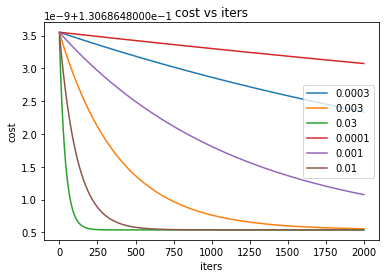

In [84]:
fig, ax = plt.subplots()
    
for alpha in candidate_alpha:
    _, costs = gardientDescent(X, y, theta, alpha, iters)
    ax.plot(np.arange(iters), costs, label = alpha)
    ax.legend()

ax.set(xlabel='iters', ylabel='cost', title='cost vs iters')
plt.show()